In [1]:
'''
Learn Machine Learning in a way that is accessible to absolute beginners. You will learn the basics of Machine Learning and how to use TensorFlow to implement many different concepts.

✏️ Kylie Ying developed this course. Check out her channel:   

 / ycubed  

⭐️ Code and Resources ⭐️
🔗 Supervised learning (classification/MAGIC): https://colab.research.google.com/dri...
🔗 Supervised learning (regression/bikes): https://colab.research.google.com/dri...
🔗 Unsupervised learning (seeds): https://colab.research.google.com/dri...
🔗 Dataets (add a note that for the bikes dataset, they may have to open the downloaded csv file and remove special characters)
🔗 MAGIC dataset: https://archive.ics.uci.edu/ml/datase...
🔗 Bikes dataset: https://archive.ics.uci.edu/ml/datase...
🔗 Seeds/wheat dataset: https://archive.ics.uci.edu/ml/datase...
'''

'\nLearn Machine Learning in a way that is accessible to absolute beginners. You will learn the basics of Machine Learning and how to use TensorFlow to implement many different concepts.\n\n✏️ Kylie Ying developed this course. Check out her channel:   \n\n / ycubed  \n\n⭐️ Code and Resources ⭐️\n🔗 Supervised learning (classification/MAGIC): https://colab.research.google.com/dri...\n🔗 Supervised learning (regression/bikes): https://colab.research.google.com/dri...\n🔗 Unsupervised learning (seeds): https://colab.research.google.com/dri...\n🔗 Dataets (add a note that for the bikes dataset, they may have to open the downloaded csv file and remove special characters)\n🔗 MAGIC dataset: https://archive.ics.uci.edu/ml/datase...\n🔗 Bikes dataset: https://archive.ics.uci.edu/ml/datase...\n🔗 Seeds/wheat dataset: https://archive.ics.uci.edu/ml/datase...\n'

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
path = "dataset/magic04.data"
df = pd.read_csv(path, header=None)
col_list = ['fLength',
            'fWidth',  
            'fSize',    
            'fConc',   
            'fConc1',  
            'fAsym',   
            'fM3Long',  
            'fM3Trans', 
            'fAlpha',  
            'fDist',  
            'class']
df.columns = col_list
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [5]:
df['class'].value_counts()
# g = gamma (signal)     12332
# h = hadron (background) 6688

g    12332
h     6688
Name: class, dtype: int64

In [6]:
df[df['class'] == 'g'].describe()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,12332.000000,12332.000000,12332.000000,12332.000000,12332.000000,12332.000000,12332.000000,12332.000000,12332.000000,12332.000000
mean,43.654539,18.592698,2.784021,0.383641,0.215048,3.236653,17.809413,0.190873,18.784309,190.229712
std,26.173434,9.028666,0.463083,0.177979,0.106201,39.632629,33.942780,13.551423,21.482585,70.302384
min,12.192900,0.000000,1.997800,0.013900,0.007300,-349.757000,-198.867000,-91.348500,0.000000,5.745600
25%,23.671625,12.244325,2.433800,0.243075,0.132475,-14.387100,-8.924800,-10.540775,3.606275,142.671750
50%,34.558000,17.053300,2.704800,0.352600,0.195000,6.638150,16.912650,1.328000,9.708150,188.120000
75%,58.972125,22.652675,3.056150,0.500150,0.281600,24.872650,37.701075,10.620550,25.809000,234.784750
max,272.063000,176.335000,5.010000,0.888900,0.675200,219.896000,215.894000,101.393000,90.000000,450.402000


In [7]:
df[df['class'] == 'h'].describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000,6688.000000
mean,70.943504,28.797373,2.900609,0.374217,0.213937,-18.287111,-2.848298,0.358245,43.985233,200.434517
std,57.952729,27.192623,0.480612,0.191270,0.118051,82.297875,70.685797,29.918149,25.983935,81.870474
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.009700,1.282600
25%,26.145400,11.243525,2.554775,0.219600,0.120500,-43.878875,-27.151475,-11.803875,21.195000,142.274250
50%,47.905400,17.384150,2.797650,0.358000,0.200250,-1.539600,11.124600,0.382600,43.382900,199.869550
75%,104.026925,36.464100,3.179850,0.510525,0.291325,22.087450,32.086275,11.972650,66.557550,250.789675
max,334.177000,256.382000,5.323300,0.893000,0.643000,575.240700,238.321000,179.851000,90.000000,495.561000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [9]:
# Check for missing values
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [10]:
df['class']

0        g
1        g
2        g
3        g
4        g
        ..
19015    h
19016    h
19017    h
19018    h
19019    h
Name: class, Length: 19020, dtype: object

In [11]:
df['class'] = (df['class']=='g').astype(int)
df['class']

0        1
1        1
2        1
3        1
4        1
        ..
19015    0
19016    0
19017    0
19018    0
19019    0
Name: class, Length: 19020, dtype: int64

In [12]:
df.info() # all are numeric now
# this dataset don't need to do one-hot encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


In [13]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


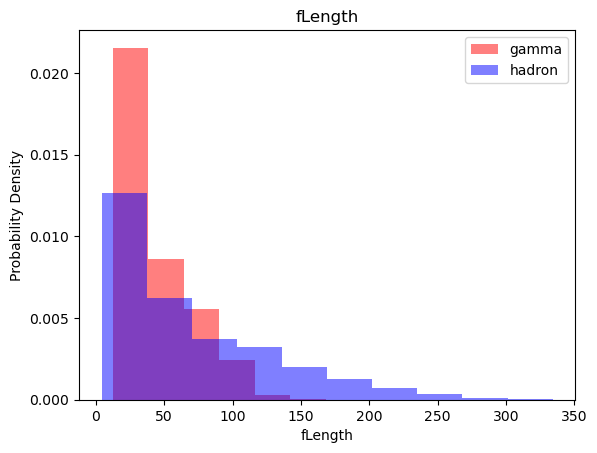

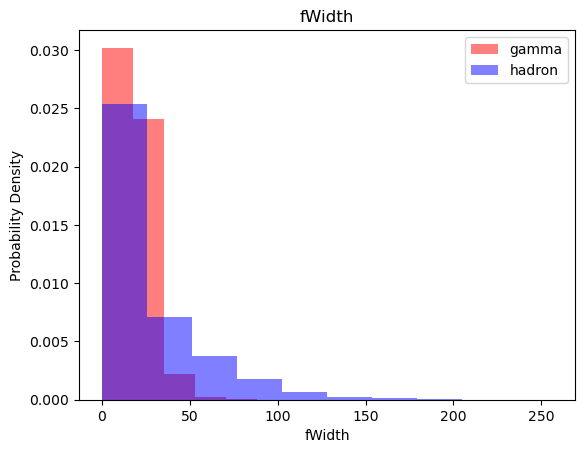

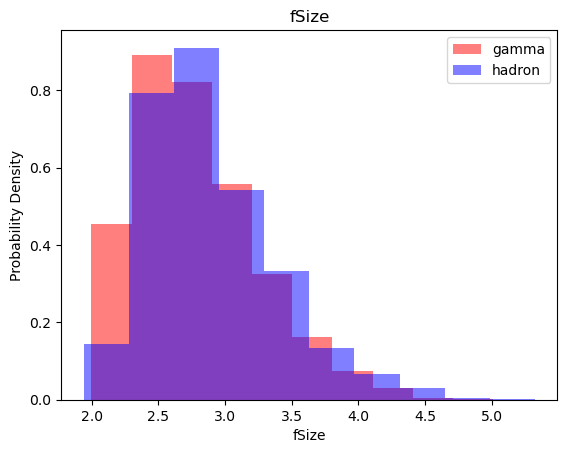

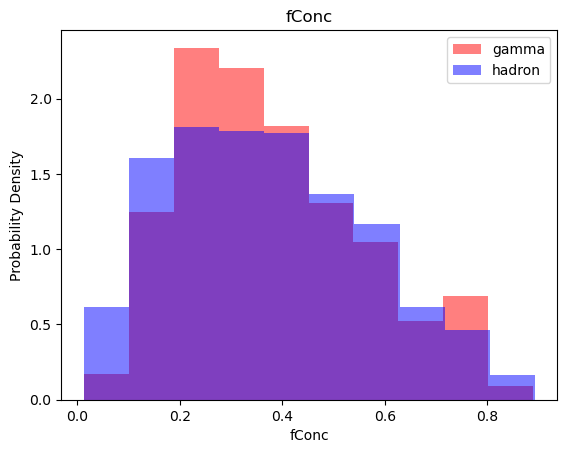

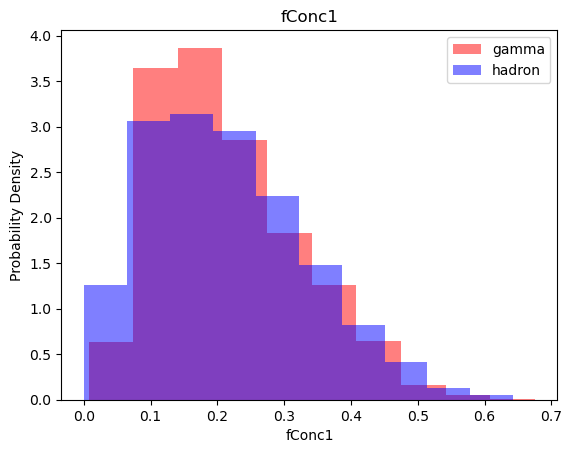

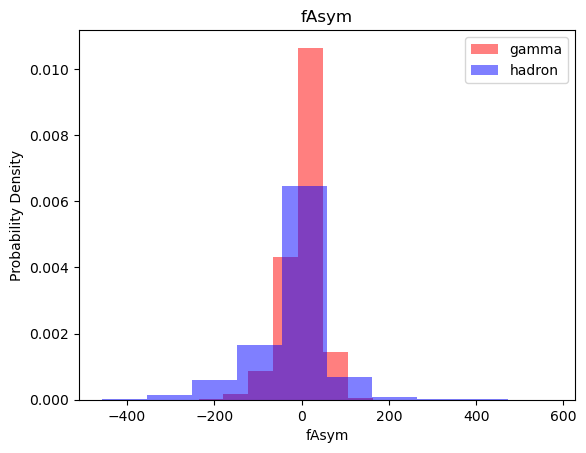

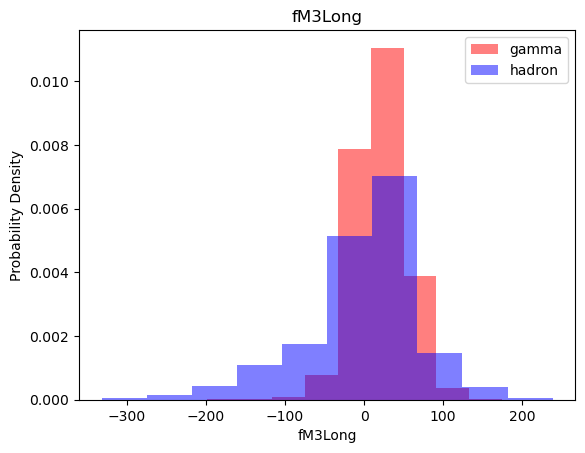

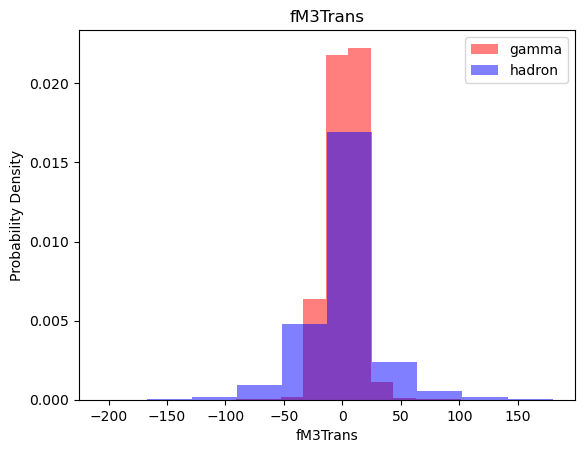

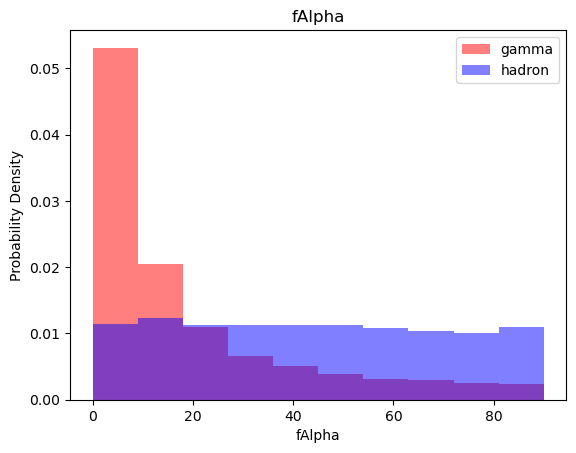

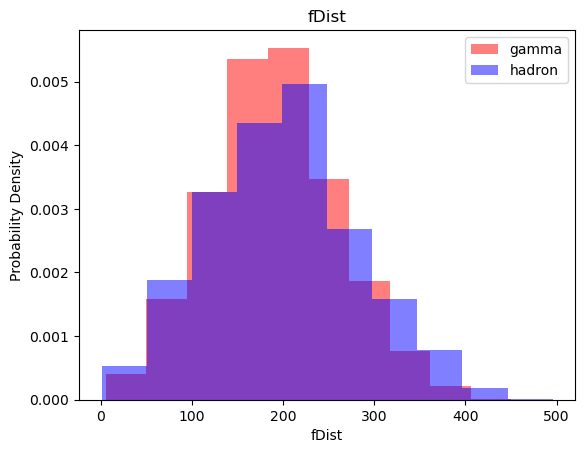

In [21]:
for label in df.columns[:-1]:
    plt.hist(df[df['class'] == 1][label], color = 'red', alpha=0.5, density = True)
    plt.hist(df[df['class'] == 0][label], color = 'blue', alpha=0.5, density = True)
    plt.title(label)
    plt.legend(['gamma', 'hadron'])
    plt.xlabel(label)
    plt.ylabel('Probability Density')
    plt.show()
# g = gamma (signal)     12332
# h = hadron (background) 6688

In [30]:
# set train validation test split
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2021)


In [ ]:
#standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [37]:
X_train.values

array([[173.256 ,  78.768 ,   4.2821, ..., -60.4553,  79.259 , 374.5748],
       [ 13.1994,  10.8032,   2.224 , ..., -11.7029,  54.0277, 181.817 ],
       [ 57.6389,  19.9578,   2.9183, ...,  18.4333,   0.619 , 113.551 ],
       ...,
       [ 28.7776,  15.095 ,   2.4683, ..., -10.0492,  30.035 ,  97.7925],
       [173.943 ,  55.7884,   3.1599, ...,  57.0811,  54.566 , 128.882 ],
       [ 94.772 ,  30.7871,   3.5949, ...,  17.1236,   4.109 , 200.597 ]])

In [38]:
y.values

array([1, 1, 1, ..., 0, 0, 0])

In [39]:
np.reshape(y.values , (-1,1))

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [43]:
data = np.hstack((X_train, np.reshape(y_train.values , (-1,1))))


In [49]:
data.shape

(12172, 11)

In [50]:
X_train.shape

(12172, 10)

In [53]:
data[:, -1]

array([0., 1., 1., ..., 1., 0., 1.])

In [57]:
y_train.values

array([0, 1, 1, ..., 1, 0, 1])

In [64]:
rosampler = RandomOverSampler()
X_train, y_train = rosampler.fit_resample(X_train, y_train)
print("dataset size", y_train.shape)
y_train.value_counts()

dataset size (15838,)


0    7919
1    7919
Name: class, dtype: int64

In [84]:
#cross validate the model
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')



In [85]:
# Print the cross-validation scores
print("Cross-validation scores:", scores)
# Calculate and print the mean score and standard deviation
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.97337664 0.96922508 0.96784069 0.99416903 0.99540414]
Mean score: 0.9800031154259885
Standard deviation: 0.01221364190224603


In [86]:
model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", scores)
# Calculate and print the mean score and standard deviation
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.9207702  0.9135101  0.91414141 0.95579413 0.95705715]
Mean score: 0.9322545991968948
Standard deviation: 0.019902819143343926


In [87]:
# import svc
from sklearn.svm import SVC
model = SVC()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
# Print the cross-validation scores
print("Cross-validation scores:", scores)
# Calculate and print the mean score and standard deviation
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.87901067 0.88222104 0.86522182 0.86681726 0.86727349]
Mean score: 0.8721088568567076
Standard deviation: 0.00705272138165755


In [88]:
# import svc
from sklearn.svm import SVC
model = SVC()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", scores)
# Calculate and print the mean score and standard deviation
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.79608586 0.80113636 0.78314394 0.78654878 0.7900221 ]
Mean score: 0.7913874097782372
Standard deviation: 0.006486118799724182


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68      1363
           1       0.82      0.80      0.81      2441

    accuracy                           0.76      3804
   macro avg       0.74      0.75      0.75      3804
weighted avg       0.77      0.76      0.77      3804



In [68]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.42      0.53      1363
           1       0.74      0.90      0.81      2441

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



In [69]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69      1363
           1       0.84      0.79      0.81      2441

    accuracy                           0.77      3804
   macro avg       0.75      0.76      0.75      3804
weighted avg       0.77      0.77      0.77      3804



/Users/ching/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
